# Problem Analysis Workshop 1
### Team 7 - Members:
- **Tilvan Madalina**  - Student number: 9058215
- **Wesley Jayavanti** - Student number: 9019852
- **Yun-Chen Wang**    - Student number: 9040873

### <font>Table of contents<font>
- [Project Description](#1-project-description)
- [Project Setup](#2-project-setup)
- [Dataset](#3-dataset)
- [Data Cleansing](#4-data-cleansing)
- [Descriptive Analysis](#5-descriptive-analysis)
  - [Summarize Data](#51-summarize-data)
  - [Visualize Data](#52-visualize-data)

---


# 1. Project Description:
<a class='anchor' id='project-description'></a>

## Findings: 
[Inside the Rating Scores: A Multilevel Analysis of the Factors Influencing Customer Satisfaction in the Hotel Industry ](https://www.researchgate.net/publication/312164283_Inside_the_Rating_Scores_A_Multilevel_Analysis_of_the_Factors_Influencing_Customer_Satisfaction_in_the_Hotel_Industry) (Radojević, Stanisic & Stanić, 2017)

This research has a multilevel analysis of factors affecting customer satisfaction in hotel industry. Data from TripAdvisor.com, includes 13,410 hotels from 80 major destinations. 
<br> <br>
Relevant factors:
- visitor's nationality
- customer reviews
- country GDP
- Hofstede's variables

## Focus:
1. Clarify the definition of customer satisfaction components
2. Use targeted questions addressing specific aspects of consumer experience
3. Rank factors in order of importance: *ex. room cleanliness, staff friendliness, location*
4. Review and refine research questions to match customer preferences changes and industry trends
5. Customer segment base - business vs. leisure travellers
6. Structured feedback - improve specific areas (1-10 scale)
7. Departments aligned with client satisfaction goals

# 2. Project Setup

In [67]:
# Import libraries
import os #eugene
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 3. Dataset

In [68]:
path = "../Dataset/The final data set (uncentered and unscaled variables).csv"
rating_df = pd.read_csv(path)
rating_df.head() # print the first 5 rows of the dataset

,Visitors_country_name,Destination_country_name,Hotel_id,Reviewer_id,Review_id,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,...,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
0,Afghanistan,Egypt,d302323,BEFE48CEC37A8BAC68FC5471B7D52A68,131620232,59,1,3,2.0,3.0,...,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Japan,d1115809,390FEEFF2C67C9ACC376C133F3E5AD9D,223296192,96,1,4,NaN,NaN,...,95,92,88,42,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Egypt,d300669,452C85191D400F6C83F249B4990CBD74,254401713,59,1,5,NaN,5.0,...,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,United Kingdom,d187989,B112C906DAA206F9F2EA9613526DCD3A,23343685,199,1,4,3.0,5.0,...,66,35,51,69,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Croatia,d601897,17552C71896B64C6EFCC959E1551F412,47403276,49,1,3,5.0,4.0,...,40,80,58,33,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Data Cleansing

The dataset we found contains 75 columns with various data such as country names, IDs, ratings, date of review, facilities and services, and Hoftede's variables. However, there are a few issues that need to be addressed before we can perform an analysis:

1. **Missing values**: Some of the columns have missing data. These need to be handled by either filling in the missing values or removing the corresponding rows.
2. **Duplicate rows**: The data is categorized by the visitor's country to each other country. This creates a lot of duplicates between the other columns that are specific to the visitor's country. We wil have to organize the data so we don't run into too much duplicates.
3. **Incorrect data types**: Some columns may have incorrect data types (e.g., an date column stored as an object instead of a datetime).

In [69]:
# Check for missing values
print(rating_df.isnull().sum())

Visitors_country_name           0
Destination_country_name        0
Hotel_id                        0
Reviewer_id                     0
Review_id                       0
                            ...  
Visitors_country_idv        24428
Visitors_country_mas        24428
Visitors_country_uai        24428
Visitors_country_lto        29408
Visitors_country_ivr        46917
Length: 80, dtype: int64


### To check for later when we need to change data types

In [70]:


list_types = rating_df.dtypes.tolist()
print(list_types)

# country names are objects
# hotel id object
# reviewer,review,countries ids are int
# ratings are float, other than value rating thats an object
# date of review and trip type are objects
# starting with hotel stars until noofroofs are float
# 1/0 values are int
# gdp values are float
# destination hostedes are int, visitors are float

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),

# 5. Descriptive Analysis

## 5.1 Summarize Data
<a class='anchor' id='51-summarize-data'></a>

### Measures of Location (mean, median and mode)

In [71]:
overall_rating = rating_df["Overall_rating"]

# Calculate the mean, median, and mode of Overall Rating
mean_rating = np.mean(overall_rating)
median_rating = np.median(overall_rating)
mode_rating = overall_rating.mode()[0]  # Use [0] to get the first mode in case of multiple modes

# Print the results
print(f"Mean: {round(mean_rating, 2)}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")


Mean: 4.03
Median: 4.0
Mode: 5


### Measures of Dispersion (quartiles , variance, deviation and standard deviation)

In [72]:
# Calculate deviation between each data point
deviations = overall_rating - mean_rating

# Create output file with deviations because we have over 1 million data entries
_output_path = "../output/overall_rating_deviations.csv"
os.makedirs(os.path.dirname(_output_path), exist_ok=True)
deviations.to_csv() 

# Calculate variance and standard deviation
variance = np.var(overall_rating)
std_dev = np.std(overall_rating)

# Calculate quartiles
quartiles = overall_rating.quantile([0.0, 0.25, 0.5, 0.75, 1.0])
df_quartiles = pd.DataFrame({
    'Quartile': quartiles.index,
    'Value': quartiles.values                      
})
# Format the 'Quartile' column to show as percentages (e.g., 25% instead of 0.25)
df_quartiles['Quartile'] = df_quartiles['Quartile'].apply(lambda x: f'{int(x*100)}%')
df_quartiles.loc[df_quartiles['Quartile'] == '0%', 'Quartile'] = "Min"
df_quartiles.loc[df_quartiles['Quartile'] == '100%', 'Quartile'] = "Max"


# Print the results
print(f"Deviations: {round(deviations,2)}")
print()
print(f"Variance: {round(variance,2)}")
print(f"Standard Deviation: {round(std_dev,2)}")
print("Quartiles:")
print(df_quartiles)

Deviations: 0         -1.03
1         -0.03
2          0.97
3         -0.03
4         -1.03
           ... 
1048570   -0.03
1048571   -1.03
1048572   -3.03
1048573   -0.03
1048574    0.97
Name: Overall_rating, Length: 1048575, dtype: float64

Variance: 1.06
Standard Deviation: 1.03
Quartiles:
  Quartile  Value
0      Min    1.0
1      25%    4.0
2      50%    4.0
3      75%    5.0
4      Max    5.0


### To do later: maybe focus on some most important variables in the selected columns. 

In [73]:
# Print summary statistics for meanigful columns
selected_columns =["Overall_rating",
                   "Location_rating",
                   "Cleanliness_rating",
                   "Rooms_rating",
                   "Service_rating",
                   "Sleepquality_rating",
                   "Value_rating",
                   "Hotel.stars",
                   "Hotel.price",
                   "Hotel.distance",
                   "Hotel.noofrooms",
                   "Destination_country_GDP",
                   "Destination_country_pdi",
                   "Destination_country_idv",
                   "Destination_country_mas",
                   "Destination_country_uai",
                   "Destination_country_lto",
                   "Destination_country_ivr"
                   ] # [1048575 rows x 19 columns]
rating_df_stat = rating_df[selected_columns]

# Add variance and IQR to summary statistics
summary_stats = rating_df_stat.describe().transpose()
summary_stats["variance"] = np.var(rating_df_stat)
summary_stats["IQR"] = rating_df_stat.quantile(0.75) - rating_df_stat.quantile(0.25)

print(summary_stats)


                             count          mean           std    min  \
Overall_rating           1048575.0      4.025749      1.028680    1.0   
Location_rating           819447.0      4.353338      0.861144    1.0   
Cleanliness_rating        848016.0      4.269430      0.960662    1.0   
Rooms_rating              793224.0      3.961217      1.054077    1.0   
Service_rating            955350.0      4.113741      1.064846    1.0   
Sleepquality_rating       734851.0      4.150196      1.015453    1.0   
Value_rating              849685.0      3.965704      1.061087    1.0   
Hotel.stars              1025737.0      3.771034      0.813294    1.0   
Hotel.price               966015.0    163.721692    110.405166    7.0   
Hotel.distance           1029802.0      3.589292      5.263627    0.0   
Hotel.noofrooms          1044163.0    213.389806    240.890239    1.0   
Destination_country_GDP  1042020.0  30479.168361  19082.761888  605.0   
Destination_country_pdi  1048575.0     55.239733   

## 5.2 Visualize Data
<a class='anchor' id='52-visualize-data'></a>

### 1. Scatter Plot

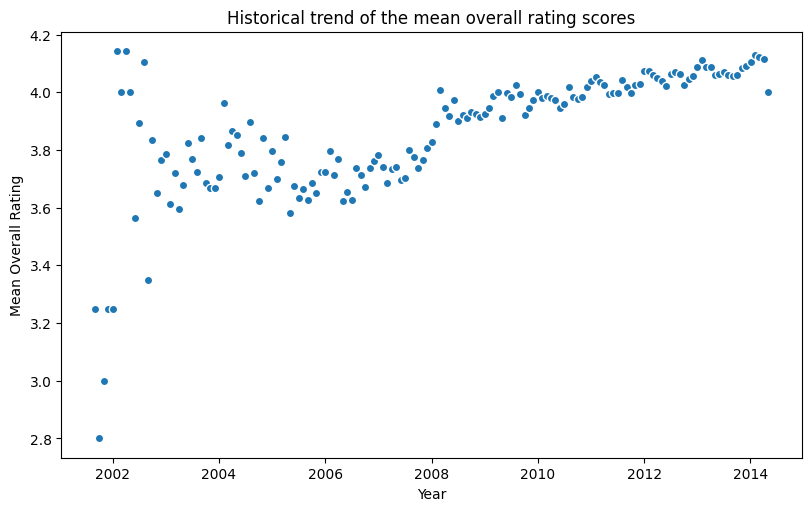

In [74]:
# Change the date column to be of type datetime
review_date = pd.to_datetime(rating_df['Date_of_review'])

# Extract the year from the review_date column
review_year_month = review_date.dt.to_period('M')

# Group by year and calculate the mean overall rating
mean_ratings_monthly = rating_df.groupby(review_year_month)['Overall_rating'].mean()
mean_ratings_monthly.index = mean_ratings_monthly.index.to_timestamp()

# Scatter Plot
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.scatter(mean_ratings_monthly.index, mean_ratings_monthly.values, edgecolors='white')
ax.set_title('Historical trend of the mean overall rating scores')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Overall Rating')

# Show ticks from 2002 to 2016 with an interval of 2 years
ticks = pd.date_range(start='2002-01-01', end='2016-01-01', freq='2Y')
plt.xticks(ticks, labels=[tick.strftime('%Y') for tick in ticks])

plt.show()

### 2. Histogram

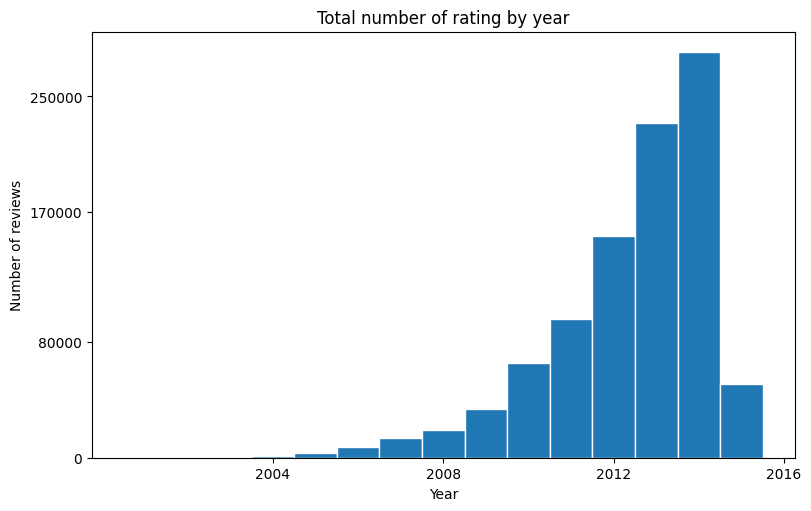

In [75]:
# Extract the year from the review_date column
review_year = review_date.dt.year

# Histogram
fig, ax = plt.subplots(figsize=(8, 5), layout="constrained")
ax.hist(review_year, bins=range(2001, 2017), edgecolor='white', align='left')
ax.set_title('Total number of rating by year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of reviews')

# Set x-axis and y-axis tick marks and labels
x_ticks = np.linspace(2004, 2016, 4)
plt.xticks(x_ticks)

y_ticks = np.linspace(0, 250000, 4)
y_ticks = [round(tick, -4) for tick in y_ticks] # round to the nearest tens of thousands (4 zeros)
plt.yticks(y_ticks)

plt.show()

### 3. Box-Whisker Plot

<class 'pandas.core.series.Series'>
Mean: 4.03
Median: 4.0
Mode: 5
Q1: 4.0,
Q3: 5.0,
IQR: 1.0;


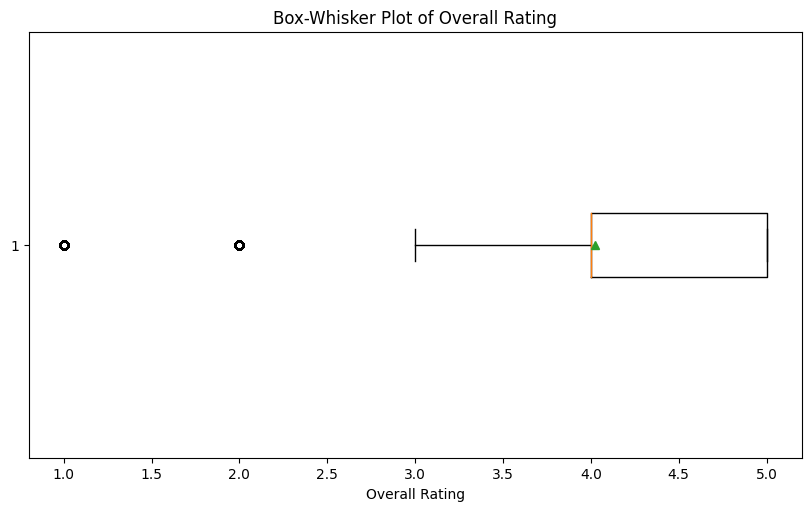

In [76]:
# Group the overall ratings by year

# Print info
print(type(overall_rating))
print(f"Mean: {round(np.mean(overall_rating), 2)}")
print(f"Median: {np.median(overall_rating)}")
print(f"Mode: {overall_rating.mode()[0]}")
Q1 = np.percentile(overall_rating, 25)  # (25th percentile)
Q3 = np.percentile(overall_rating, 75)  # (75th percentile)
IQR = Q3 - Q1
print(f"Q1: {Q1},\nQ3: {Q3},\nIQR: {IQR};")

# Box-Whisker Plot
fig, ax = plt.subplots(figsize=(8, 5), layout="constrained")
plt.boxplot(overall_rating, showmeans=True, vert=False)
ax.set_title('Box-Whisker Plot of Overall Rating')
ax.set_xlabel('Overall Rating')

plt.show()


### 4. Venn Diagram

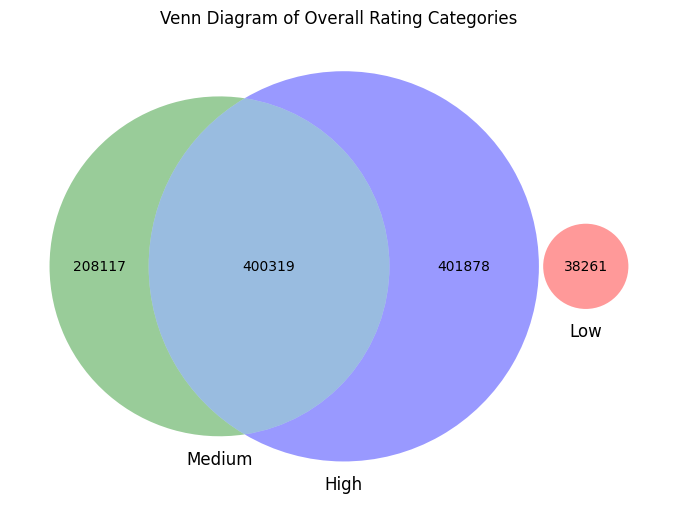

In [77]:
# Define rating categories (for example, Low, Medium, High ratings)
low = set(overall_rating[overall_rating < 2.0].index)
medium = set(overall_rating[(overall_rating >= 2.0) & (overall_rating <= 4)].index)
high = set(overall_rating[overall_rating >= 4].index)

# Calculate the sizes of all 7 regions in the Venn diagram
only_low = len(low - medium - high)
only_medium = len(medium - low - high)
only_high = len(high - low - medium)
low_and_medium = len(low & medium - high)
medium_and_high = len(medium & high - low)
low_and_high = len(low & high - medium)
all_three = len(low & medium & high)

# Venn Diagram
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
venn = venn3(subsets=(only_low, only_medium, low_and_medium, only_high, low_and_high, medium_and_high, all_three), set_labels=('Low', 'Medium', 'High'))

plt.title('Venn Diagram of Overall Rating Categories')
plt.show()

### testing venn diagram

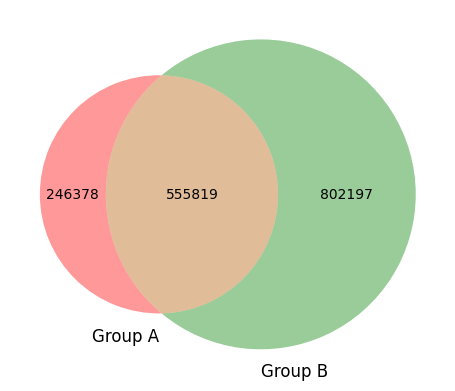

38261
208117
802197
38261   208117   401878
0   400319   0
0


In [78]:


from matplotlib_venn import venn2  
venn2(subsets = (246378, 802197, 555819), set_labels = ('Group A', 'Group B')) 
plt.show()

print(overall_rating[overall_rating < 2.0].count())
print(overall_rating[(overall_rating >= 2.0) & (overall_rating < 4)].count())
print(overall_rating[overall_rating >= 4].count())

only_low = len(low - medium - high)
only_medium = len(medium - low - high)
only_high = len(high - low - medium)
low_and_medium = len(low & medium - high)
medium_and_high = len(medium & high - low)
low_and_high = len(low & high - medium)
all_three = len(low & medium & high)

print(only_low, " ", only_medium, " ", only_high)
print(low_and_medium, " ", medium_and_high, " ", low_and_high)
print(all_three)
